In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

In [2]:
# Loading the MNIST data from keras.datasets

(X_train, Y_train), (X_test, Y_test) =  mnist.load_data()

In [3]:
# shape of the numpy arrays
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


Training Images = 60,000

Image dimension --> 28 x 28

Grayscale Image --> 1 channel

In [4]:
print(X_train[42])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   1  26 111 195 230
   30   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  28 107 195 254 25

In [5]:
print(X_train[42].shape)

(28, 28)


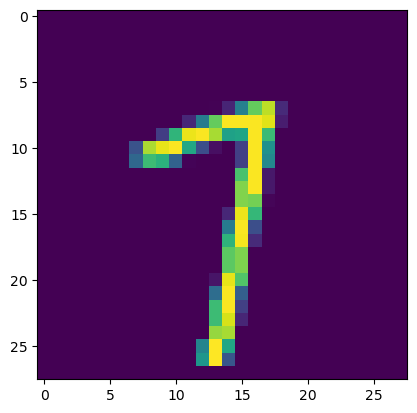

7


In [6]:
plt.imshow(X_train[42])
plt.show()

# print the corresponding label
print(Y_train[42])

In [7]:
# unique values in Y_train
print(np.unique(Y_train))

# unique values in Y_test
print(np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [8]:
# scaling the values

X_train = X_train/255
X_test = X_test/255

In [9]:
print(X_train[42])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [10]:
# setting up the layers of the Neural  Network

model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28,28)),
                          keras.layers.Dense(50, activation='relu'),
                          keras.layers.Dense(10, activation='sigmoid')
])

2024-05-31 01:38:46.870770: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2024-05-31 01:38:46.870798: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2024-05-31 01:38:46.870813: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2024-05-31 01:38:46.871235: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-05-31 01:38:46.871605: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [11]:
# compiling the Neural Network

model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
# training the Neural Network

model.fit(X_train, Y_train, epochs=10)

Epoch 1/10


2024-05-31 01:39:23.531551: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 10s 4ms/step - loss: 0.3853 - accuracy: 0.8911
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2969 - accuracy: 0.9172
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2907 - accuracy: 0.9191
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2895 - accuracy: 0.9197
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2921 - accuracy: 0.9197
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2936 - accuracy: 0.9189
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2968 - accuracy: 0.9190
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2994 - accuracy: 0.9183
Epoch 9/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3022 - accuracy: 0.9188
Epoch 10/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3066 - accura

In [13]:
# Accuracy on Test data

loss, accuracy = model.evaluate(X_test, Y_test)

 29/313 [=>............................] - ETA: 1s - loss: 0.3444 - accuracy: 0.9030

2024-05-31 01:40:58.559780: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 1s 4ms/step - loss: 0.3334 - accuracy: 0.9144


In [14]:
# Save the trained model to a directory
model.save("./saved_model/")

INFO:tensorflow:Assets written to: ./saved_model/assets


INFO:tensorflow:Assets written to: ./saved_model/assets


### (1) Post training quantization

**Without quantization**

In [19]:
converter = tf.lite.TFLiteConverter.from_saved_model("./saved_model")
tflite_model=converter.convert()

2024-05-31 01:53:45.298388: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:364] Ignored output_format.
2024-05-31 01:53:45.298405: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:367] Ignored drop_control_dependency.
2024-05-31 01:53:45.298562: I tensorflow/cc/saved_model/reader.cc:45] Reading SavedModel from: ./saved_model
2024-05-31 01:53:45.299314: I tensorflow/cc/saved_model/reader.cc:91] Reading meta graph with tags { serve }
2024-05-31 01:53:45.299321: I tensorflow/cc/saved_model/reader.cc:132] Reading SavedModel debug info (if present) from: ./saved_model
2024-05-31 01:53:45.301187: I tensorflow/cc/saved_model/loader.cc:231] Restoring SavedModel bundle.
2024-05-31 01:53:45.334631: I tensorflow/cc/saved_model/loader.cc:215] Running initialization op on SavedModel bundle at path: ./saved_model
2024-05-31 01:53:45.344538: I tensorflow/cc/saved_model/loader.cc:314] SavedModel load for tags { serve }; Status: success: OK. Took 45977 microsecon

In [20]:
len(tflite_model)

161004

**With quantization**

In [23]:
converter=tf.lite.TFLiteConverter.from_saved_model("./saved_model")
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quant_model = converter.convert()

2024-05-31 02:02:12.170430: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:364] Ignored output_format.
2024-05-31 02:02:12.170447: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:367] Ignored drop_control_dependency.
2024-05-31 02:02:12.170653: I tensorflow/cc/saved_model/reader.cc:45] Reading SavedModel from: ./saved_model
2024-05-31 02:02:12.171374: I tensorflow/cc/saved_model/reader.cc:91] Reading meta graph with tags { serve }
2024-05-31 02:02:12.171381: I tensorflow/cc/saved_model/reader.cc:132] Reading SavedModel debug info (if present) from: ./saved_model
2024-05-31 02:02:12.173431: I tensorflow/cc/saved_model/loader.cc:231] Restoring SavedModel bundle.
2024-05-31 02:02:12.207782: I tensorflow/cc/saved_model/loader.cc:215] Running initialization op on SavedModel bundle at path: ./saved_model
2024-05-31 02:02:12.217503: I tensorflow/cc/saved_model/loader.cc:314] SavedModel load for tags { serve }; Status: success: OK. Took 46850 microsecon

In [24]:
len(tflite_quant_model)

43480

In [26]:
# Save the TFLite models to files
with open("tflite_model.tflite","wb") as f:
    f.write(tflite_model)

with open("tflite_quant_model.tflite","wb") as f:
    f.write(tflite_quant_model)

### (2) Quantization aware training

In [30]:
# Quantize the entire model using Quantization Aware Training (QAT)
import tensorflow_model_optimization as tfmot

quantize_model = tfmot.quantization.keras.quantize_model

q_aware_model = quantize_model(model)

# Compile the quantization aware model
q_aware_model.compile(optimizer="adam",
                      loss="sparse_categorical_crossentropy",
                      metrics=["accuracy"])

# Print the model summary to see the architecture
q_aware_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 quantize_layer (QuantizeLa  (None, 28, 28)            3         
 yer)                                                            
                                                                 
 quant_flatten (QuantizeWra  (None, 784)               1         
 pperV2)                                                         
                                                                 
 quant_dense (QuantizeWrapp  (None, 50)                39255     
 erV2)                                                           
                                                                 
 quant_dense_1 (QuantizeWra  (None, 10)                515       
 pperV2)                                                         
                                                                 
Total params: 39774 (155.37 KB)
Trainable params: 39760 

In [31]:
# Train the quantization aware model for 1 epoch
q_aware_model.fit(X_train,Y_train,epochs=1)

2024-05-31 02:16:25.062828: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 19s 9ms/step - loss: 0.4632 - accuracy: 0.8702


In [32]:
# Evaluate the quantization aware model on the test data
q_aware_model.evaluate(X_test,Y_test)

  9/313 [..............................] - ETA: 1s - loss: 0.2508 - accuracy: 0.9410 

2024-05-31 02:16:54.946915: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 2s 5ms/step - loss: 0.3649 - accuracy: 0.9093


[0.3648834824562073, 0.9093000292778015]

In [35]:
# Convert the quantization aware trained model to TFLite format
converter = tf.lite.TFLiteConverter.from_keras_model(q_aware_model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_qaware_model = converter.convert()

INFO:tensorflow:Assets written to: /var/folders/hy/b8mrcp_x1sxbt1d3f8hfqcmm0000gn/T/tmp2zzlwtgf/assets


INFO:tensorflow:Assets written to: /var/folders/hy/b8mrcp_x1sxbt1d3f8hfqcmm0000gn/T/tmp2zzlwtgf/assets
/Users/abhishek/tensorflow-test/env/lib/python3.8/site-packages/tensorflow/lite/python/convert.py:887: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn(
2024-05-31 02:19:26.487748: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:364] Ignored output_format.
2024-05-31 02:19:26.487762: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:367] Ignored drop_control_dependency.
2024-05-31 02:19:26.487917: I tensorflow/cc/saved_model/reader.cc:45] Reading SavedModel from: /var/folders/hy/b8mrcp_x1sxbt1d3f8hfqcmm0000gn/T/tmp2zzlwtgf
2024-05-31 02:19:26.489453: I tensorflow/cc/saved_model/reader.cc:91] Reading meta graph with tags { serve }
2024-05-31 02:19:26.489460: I tensorflow/cc/saved_model/reader.cc:132] Reading SavedModel debug info (if present) from: /var/folders/hy/b8mrcp_x1sxbt1d3f8hf

In [36]:
# Save the quantization aware trained TFLite model to a file
with open("tflite_qaware_model.tflite","wb") as f:
    f.write(tflite_qaware_model)